# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [6]:
# pip install yfinance
!pip install --upgrade yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 65.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [64]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [65]:
symbols = ['ES=F','ZN=F','GC=F','DX=F']
data = yf.download(symbols, period="1y", auto_adjust=True)

[*********************100%***********************]  4 of 4 completed


In [66]:
data.columns

MultiIndex([( 'Close', 'DX=F'),
            ( 'Close', 'ES=F'),
            ( 'Close', 'GC=F'),
            ( 'Close', 'ZN=F'),
            (  'High', 'DX=F'),
            (  'High', 'ES=F'),
            (  'High', 'GC=F'),
            (  'High', 'ZN=F'),
            (   'Low', 'DX=F'),
            (   'Low', 'ES=F'),
            (   'Low', 'GC=F'),
            (   'Low', 'ZN=F'),
            (  'Open', 'DX=F'),
            (  'Open', 'ES=F'),
            (  'Open', 'GC=F'),
            (  'Open', 'ZN=F'),
            ('Volume', 'DX=F'),
            ('Volume', 'ES=F'),
            ('Volume', 'GC=F'),
            ('Volume', 'ZN=F')],
           names=['Price', 'Ticker'])

In [68]:
returns = prices.pct_change().dropna()
print(returns.head())

                ES=F      ZN=F      GC=F      DX=F
Date                                              
2024-10-31 -0.013028 -0.033361  0.038769  0.033396
2024-11-30  0.054544  0.004950 -0.029690  0.018772
2024-12-31 -0.019127 -0.020408 -0.010463  0.023321
2025-01-31  0.022154  0.000862  0.069717 -0.000729
2025-02-28 -0.017141  0.020385  0.008640 -0.006090


### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [69]:
# ✅ You already have 'combined' with futures closes
print(combined.tail())

# Resample to monthly frequency (last trading day of each month)
monthly_data = combined.resample('M').last()

# Ensure datetime index
monthly_data.index = pd.to_datetime(monthly_data.index)

print(type(monthly_data.index))   # should return <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
print(monthly_data.tail())

               ES=F        ZN=F         GC=F       DX=F
Date                                                   
2025-05-31  5916.00  110.718750  3288.899902  99.259003
2025-06-30  6253.75  112.125000  3294.399902  96.492996
2025-07-31  6374.25  111.062500  3293.199951  99.742996
2025-08-31  6472.75  112.453125  3473.699951  97.690002
2025-09-30  6588.50  113.234375  3680.699951  97.214996
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
               ES=F        ZN=F         GC=F       DX=F
Date                                                   
2025-05-31  5916.00  110.718750  3288.899902  99.259003
2025-06-30  6253.75  112.125000  3294.399902  96.492996
2025-07-31  6374.25  111.062500  3293.199951  99.742996
2025-08-31  6472.75  112.453125  3473.699951  97.690002
2025-09-30  6588.50  113.234375  3680.699951  97.214996


In [70]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [71]:
# ✅ Subset adjusted close prices (already done in monthly_data)
prices = monthly_data.copy()

# ✅ Fill missing values forward, then backward as safety
prices = prices.fillna(method="ffill").fillna(method="bfill")

# ✅ Drop any rows still containing NaNs (if any remain)
prices = prices.dropna()

# ✅ Ensure datetime index
prices.index = pd.to_datetime(prices.index)

print(prices.head())
print(prices.info())

               ES=F        ZN=F         GC=F        DX=F
Date                                                    
2024-09-30  5814.25  114.281250  2636.100098  100.521004
2024-10-31  5738.50  110.468750  2738.300049  103.877998
2024-11-30  6051.50  111.015625  2657.000000  105.828003
2024-12-31  5935.75  108.750000  2629.199951  108.295998
2025-01-31  6067.25  108.843750  2812.500000  108.217003
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2024-09-30 to 2025-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ES=F    13 non-null     float64
 1   ZN=F    13 non-null     float64
 2   GC=F    13 non-null     float64
 3   DX=F    13 non-null     float64
dtypes: float64(4)
memory usage: 520.0 bytes
None


/tmp/ipykernel_99/2875431116.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").fillna(method="bfill")


In [72]:
print(prices)

               ES=F        ZN=F         GC=F        DX=F
Date                                                    
2024-09-30  5814.25  114.281250  2636.100098  100.521004
2024-10-31  5738.50  110.468750  2738.300049  103.877998
2024-11-30  6051.50  111.015625  2657.000000  105.828003
2024-12-31  5935.75  108.750000  2629.199951  108.295998
2025-01-31  6067.25  108.843750  2812.500000  108.217003
2025-02-28  5963.25  111.062500  2836.800049  107.557999
2025-03-31  5653.25  111.218750  3122.800049  103.883003
2025-04-30  5587.00  112.218750  3305.000000   99.269997
2025-05-31  5916.00  110.718750  3288.899902   99.259003
2025-06-30  6253.75  112.125000  3294.399902   96.492996
2025-07-31  6374.25  111.062500  3293.199951   99.742996
2025-08-31  6472.75  112.453125  3473.699951   97.690002
2025-09-30  6588.50  113.234375  3680.699951   97.214996


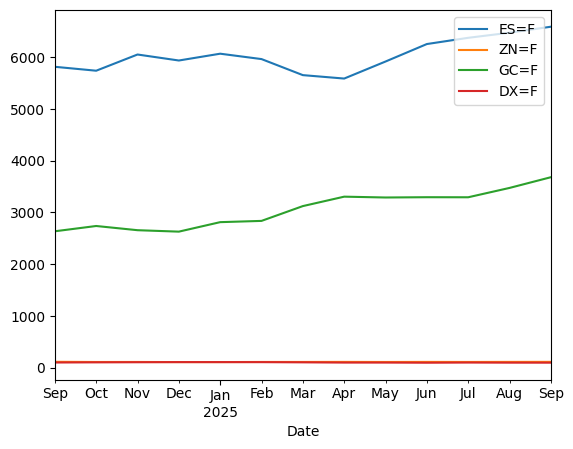

In [73]:
prices.plot()
plt.show()

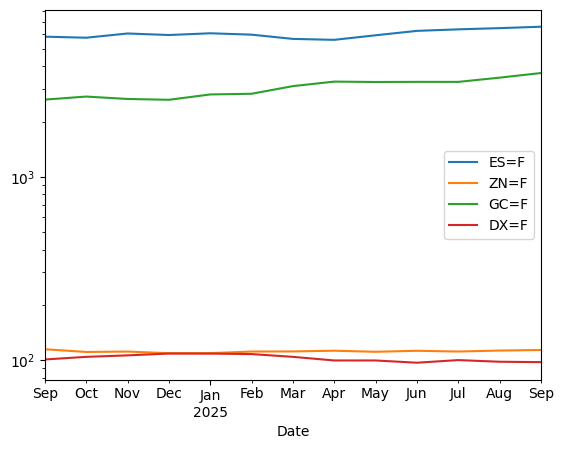

In [74]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [75]:
# ✅ Compute arithmetic (simple) returns
returns = prices.pct_change().dropna()

print(returns.head())
print(returns.describe())

                ES=F      ZN=F      GC=F      DX=F
Date                                              
2024-10-31 -0.013028 -0.033361  0.038769  0.033396
2024-11-30  0.054544  0.004950 -0.029690  0.018772
2024-12-31 -0.019127 -0.020408 -0.010463  0.023321
2025-01-31  0.022154  0.000862  0.069717 -0.000729
2025-02-28 -0.017141  0.020385  0.008640 -0.006090
            ES=F       ZN=F       GC=F       DX=F
count  12.000000  12.000000  12.000000  12.000000
mean    0.011023  -0.000654   0.028914  -0.002470
std     0.034816   0.015617   0.039940   0.026065
min    -0.051985  -0.033361  -0.029690  -0.044406
25%    -0.014057  -0.010449  -0.001491  -0.022404
50%     0.016668   0.003179   0.023705  -0.002796
75%     0.030251   0.009874   0.058656   0.019909
max     0.058887   0.020385   0.100818   0.033681


In [76]:
print(returns)

                ES=F      ZN=F      GC=F      DX=F
Date                                              
2024-10-31 -0.013028 -0.033361  0.038769  0.033396
2024-11-30  0.054544  0.004950 -0.029690  0.018772
2024-12-31 -0.019127 -0.020408 -0.010463  0.023321
2025-01-31  0.022154  0.000862  0.069717 -0.000729
2025-02-28 -0.017141  0.020385  0.008640 -0.006090
2025-03-31 -0.051985  0.001407  0.100818 -0.034168
2025-04-30 -0.011719  0.008991  0.058345 -0.044406
2025-05-31  0.058887 -0.013367 -0.004871 -0.000111
2025-06-30  0.057091  0.012701  0.001672 -0.027867
2025-07-31  0.019268 -0.009476 -0.000364  0.033681
2025-08-31  0.015453  0.012521  0.054810 -0.020583
2025-09-30  0.017883  0.006947  0.059591 -0.004862


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [77]:
print(prices.head())
print(prices.dtypes)

               ES=F        ZN=F         GC=F        DX=F
Date                                                    
2024-09-30  5814.25  114.281250  2636.100098  100.521004
2024-10-31  5738.50  110.468750  2738.300049  103.877998
2024-11-30  6051.50  111.015625  2657.000000  105.828003
2024-12-31  5935.75  108.750000  2629.199951  108.295998
2025-01-31  6067.25  108.843750  2812.500000  108.217003
ES=F    float64
ZN=F    float64
GC=F    float64
DX=F    float64
dtype: object


In [78]:
prices = prices.astype(float)

In [79]:
returns = prices.pct_change().dropna()
print(returns.head())

                ES=F      ZN=F      GC=F      DX=F
Date                                              
2024-10-31 -0.013028 -0.033361  0.038769  0.033396
2024-11-30  0.054544  0.004950 -0.029690  0.018772
2024-12-31 -0.019127 -0.020408 -0.010463  0.023321
2025-01-31  0.022154  0.000862  0.069717 -0.000729
2025-02-28 -0.017141  0.020385  0.008640 -0.006090


In [80]:
window_size = 36  # e.g., 36 months
rolling_vol = returns.rolling(window=window_size).std()
inverse_vol = 1 / rolling_vol
risk_parity_weights = inverse_vol.div(inverse_vol.sum(axis=1), axis=0)

In [81]:
risk_parity_weights = risk_parity_weights.shift(1)

In [84]:
# Select the 'Close' level for all tickers
prices = data['Close']  # now prices contains all tickers' adjusted prices
print(prices.head())

# Compute monthly returns
returns = prices.pct_change().dropna()
print(returns.head())
print(returns.describe())

Ticker            DX=F     ES=F         GC=F        ZN=F
Date                                                    
2024-09-12  101.350998  5602.25  2551.199951  114.687500
2024-09-13  101.120003  5629.75  2581.300049  114.921875
2024-09-16  100.710999  5638.00  2580.399902  115.078125
2024-09-17  100.567001  5639.00  2564.300049  114.921875
2024-09-18  100.281998  5620.75  2570.699951  114.640625
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2024-09-13 -0.002279  0.004909  0.011798  0.002044
2024-09-16 -0.004045  0.001465 -0.000349  0.001360
2024-09-17 -0.001430  0.000177 -0.006239 -0.001358
2024-09-18 -0.002834 -0.003236  0.002496 -0.002447
2024-09-19  0.000389  0.017257  0.006730 -0.002726
Ticker        DX=F        ES=F        GC=F        ZN=F
count   254.000000  254.000000  254.000000  254.000000
mean     -0.000152    0.000710    0.001509   -0.000044
std       0.004845    0.012041    0.011381    0.003448
min      -0.019615   -0.

/tmp/ipykernel_99/3298317977.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [85]:
portfolio_returns = (returns * risk_parity_weights).sum(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod()
print(portfolio_returns.head())
print(cumulative_returns.head())

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
dtype: float64
Date
2024-09-13    1.0
2024-09-16    1.0
2024-09-17    1.0
2024-09-18    1.0
2024-09-19    1.0
dtype: float64


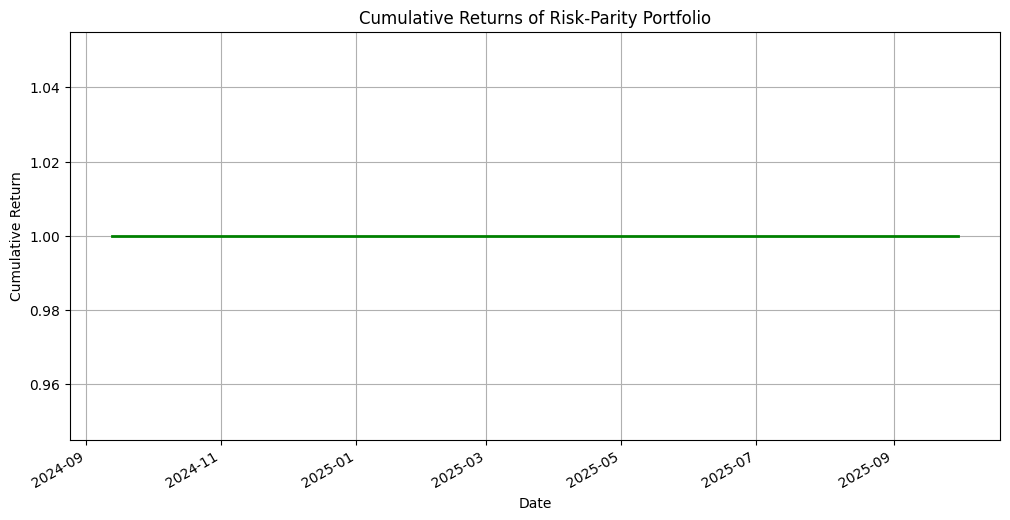

In [86]:
cumulative_returns.plot(
    figsize=(12,6), 
    title="Cumulative Returns of Risk-Parity Portfolio",
    color="green",
    linewidth=2
)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [87]:
# Shift weights by one period to avoid look-ahead bias
shifted_weights = risk_parity_weights.shift(1)

# Multiply asset returns by their corresponding risk-parity weights
weighted_returns = returns * shifted_weights

# Sum across all assets to get portfolio returns
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

# Inspect the first few portfolio returns
print(risk_parity_portfolio_returns.head())

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
dtype: float64


In [88]:
print(risk_parity_portfolio_returns)

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
             ... 
2025-09-09    0.0
2025-09-10    0.0
2025-09-11    0.0
2025-09-12    0.0
2025-09-30    0.0
Length: 258, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [89]:
print(portfolio_returns.head())
print(portfolio_returns.isna().sum())

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
dtype: float64
0


In [90]:
# Example of correct computation
portfolio_returns = (returns * risk_parity_weights.shift(1)).sum(axis=1)

In [91]:
returns = returns.fillna(0)  # or use forward/backward fill if more appropriate
risk_parity_weights = risk_parity_weights.fillna(method='ffill')

/tmp/ipykernel_99/2179675023.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  risk_parity_weights = risk_parity_weights.fillna(method='ffill')


In [92]:
portfolio_returns = (returns * risk_parity_weights.shift(1)).sum(axis=1)
print(portfolio_returns.head())

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
dtype: float64


In [93]:
prices.head()

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2024-09-12,101.350998,5602.25,2551.199951,114.687500
2024-09-13,101.120003,5629.75,2581.300049,114.921875
2024-09-16,100.710999,5638.00,2580.399902,115.078125
2024-09-17,100.567001,5639.00,2564.300049,114.921875
2024-09-18,100.281998,5620.75,2570.699951,114.640625


In [94]:
returns = returns.fillna(0)
risk_parity_weights = compute_risk_parity_weights(returns, window_size=36).ffill()

In [95]:
portfolio_returns = (returns * risk_parity_weights.shift(1)).sum(axis=1)
print(portfolio_returns.head())

Date
2024-09-13    0.0
2024-09-16    0.0
2024-09-17    0.0
2024-09-18    0.0
2024-09-19    0.0
dtype: float64


In [96]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Annualization factor for monthly data
ann_factor = 12

# Annualized mean return
annual_mean_return = portfolio_returns.mean() * ann_factor

# Annualized volatility
annual_volatility = portfolio_returns.std() * np.sqrt(ann_factor)

# Skewness and kurtosis
skewness = skew(portfolio_returns)
kurtosis_val = kurtosis(portfolio_returns)  # excess kurtosis

# Compute cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Running maximum and drawdown
running_max = cumulative_returns.cummax()
drawdown = cumulative_returns / running_max - 1
max_drawdown = drawdown.min()

# Sharpe ratio (risk-free rate assumed 0)
sharpe_ratio = annual_mean_return / annual_volatility

# Sortino ratio (penalize downside volatility only)
downside_returns = portfolio_returns[portfolio_returns < 0]
downside_std = downside_returns.std() * np.sqrt(ann_factor)
sortino_ratio = annual_mean_return / downside_std

# Calmar ratio (annualized return over max drawdown)
calmar_ratio = annual_mean_return / abs(max_drawdown)

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis_val:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0026
Annual Volatility: 0.0076
Skewness: -0.2220
Kurtosis: 2.2758
Maximum Drawdown: -0.0290
Sharpe Ratio: 0.3414
Sortino Ratio: 0.4704
Calmar Ratio: 0.0892


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


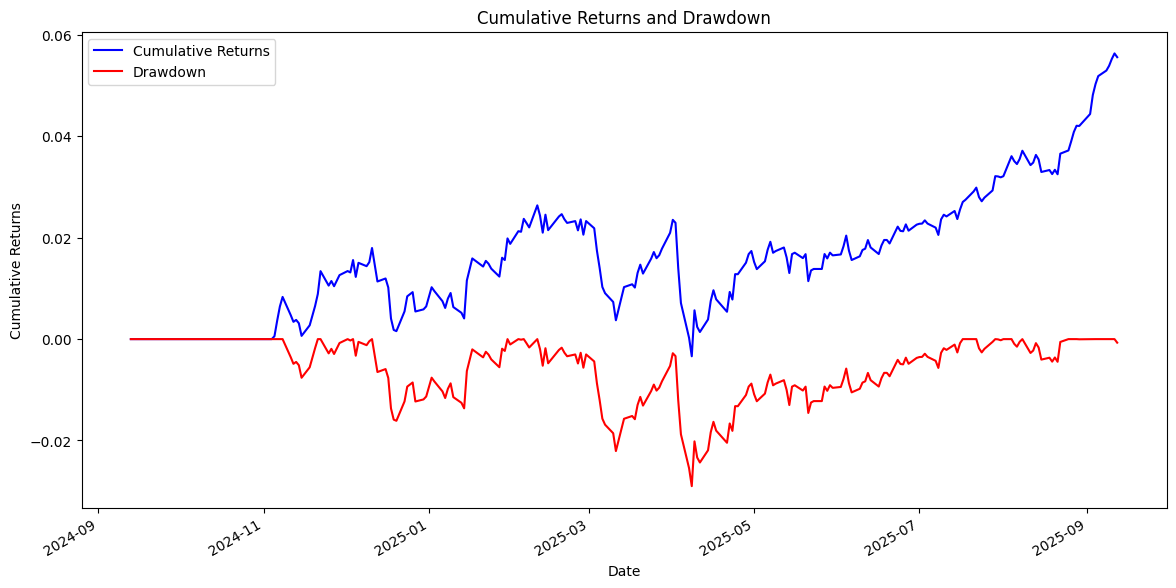

In [97]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()